<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t' )#открываем датасет
data.head()#выводим первые 5 строк 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()#смотрим информацию о столбцах датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()#смотрим численные значения столбцов

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.sample(frac=0.25)#выводим рандомные строки 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19902,11,6990000.0,64.5,2018-11-22T00:00:00,2,2.55,10.0,34.3,5,NaN,...,12.7,NaN,Санкт-Петербург,29530.0,12391.0,1.0,534.0,1.0,177.0,4.0
6821,11,4150000.0,37.4,2016-03-14T00:00:00,1,NaN,5.0,18.6,3,False,...,8.0,0.0,Сестрорецк,58120.0,35049.0,2.0,508.0,1.0,60.0,98.0
13491,15,3469000.0,41.3,2018-02-22T00:00:00,1,NaN,5.0,19.7,2,NaN,...,12.1,1.0,посёлок Шушары,10066.0,24920.0,0.0,NaN,0.0,NaN,11.0
22476,12,3790000.0,40.2,2018-01-13T00:00:00,1,2.60,10.0,18.5,4,NaN,...,10.7,NaN,Санкт-Петербург,41204.0,11387.0,0.0,NaN,0.0,NaN,215.0
13569,11,1100000.0,32.0,2017-02-12T00:00:00,1,2.60,2.0,16.0,2,False,...,7.2,NaN,поселок Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,9,4200000.0,40.0,2017-10-20T00:00:00,1,NaN,16.0,20.0,3,NaN,...,10.0,NaN,Санкт-Петербург,11118.0,12176.0,0.0,NaN,0.0,NaN,34.0
15357,2,7820000.0,55.6,2017-06-03T00:00:00,2,NaN,12.0,30.8,11,NaN,...,5.8,1.0,Санкт-Петербург,29990.0,4870.0,1.0,641.0,1.0,145.0,332.0
17870,10,7600000.0,73.9,2019-01-11T00:00:00,4,2.55,9.0,54.8,6,NaN,...,6.8,NaN,Санкт-Петербург,44975.0,13640.0,0.0,NaN,0.0,NaN,13.0
15301,6,3750000.0,63.8,2016-06-03T00:00:00,3,2.55,9.0,35.7,7,NaN,...,9.8,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,760.0


In [6]:
data.tail()#выводим последние 5 строк датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

В таблице непонятные значения NaN и неправильные типы даных у столбцов, будем от этого избавляться.

## Предобработка данных

In [7]:
data.isnull().sum()#смотрим в каких столбцах и сколько нулей

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.dtypes#смотрим какие типы данных используются в столбцах 

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [9]:
data['is_apartment'].astype(bool)#задаем тип буул, чтобы передавать стобцу да/нет
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#приставаем дате формат даты


In [10]:
#меняем нули столбцов на среднее значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())

In [11]:
#присваиваем жил.площади среднее значение в зависимости от кол-ва комнат 
data['living_area'] = data['living_area'].fillna(0)
data.groupby('rooms')['living_area'].transform('median')
data['living_area_avg'] = data.groupby('rooms')['living_area'].transform('median')
data.loc[data['living_area'] == 0, 'living_area'] = data['living_area_avg']

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)#меняем пропуски на да/нет
data['balcony'] = data['balcony'].fillna(0)#меняем пропуски на ноль опираясь на то, что балкона в квартире нет
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())#меняем пропуски на среднее значение категории
data['locality_name'] = data['locality_name'].fillna('unknown')#меняем пропуски населенных пунктов на "неизвестный"

In [13]:
#меняем пропуски на среднее расстояние до аэропорта в зависимости от локации 
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest_avg'] = data.groupby('locality_name')['airports_nearest'].transform('median')
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = data['airports_nearest_avg']

In [14]:
#меняем пропуски на среднее значение в зависимости от локации
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data.groupby('locality_name')['cityCenters_nearest'].transform('median')
data['cityCenters_nearest_avg'] = data.groupby('locality_name')['cityCenters_nearest'].transform('median')
data.loc[data['cityCenters_nearest'] == 0, 'cityCenters_nearest'] = data['cityCenters_nearest_avg']

In [15]:
#меняем пропуски на ноль, опираясь на то, что парков и прудов нет
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [16]:
#меняем пропуски на среднее значение в зависимости от локации
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data.groupby('locality_name')['parks_nearest'].transform('median')
data['parks_nearest_avg'] = data.groupby('locality_name')['parks_nearest'].transform('median')
data.loc[data['parks_nearest'] == 0, 'parks_nearest'] = data['parks_nearest_avg']

In [17]:
#меняем пропуски на среднее значение в зависимости от локации
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data.groupby('locality_name')['ponds_nearest'].transform('median')
data['ponds_nearest_avg'] = data.groupby('locality_name')['ponds_nearest'].transform('median')
data.loc[data['ponds_nearest'] == 0, 'ponds_nearest'] = data['ponds_nearest_avg']

In [18]:
#поменяем на ноль, допустим квартиру купили в этот же день, как выложили объявление
data['days_exposition'] = data['days_exposition'].fillna(0)

In [19]:
# меняем тип на целые числа, этаж не может быть,условно, 14.3
data['floors_total']=data['floors_total'].astype('int')
data['floor']=data['floor'].astype('int')

In [20]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images               23699 non-null int64
last_price                 23699 non-null float64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null int64
ceiling_height             23699 non-null float64
floors_total               23699 non-null int64
living_area                23699 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null bool
studio                     23699 non-null bool
open_plan                  23699 non-null bool
kitchen_area               23699 non-null float64
balcony                    23699 non-null float64
locality_name              23699 non-null object
airports_nearest           23699 non-null float64
cityCenters_nearest        23699 non-null float64
parks_around3000           23699 non-null float64
pa

In [21]:
#Смотрим количесво занимаемой памяти для каждого типа
for dtype in ['float','int','object']:
    selected_dtype = data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.17 MB
Average memory usage for int columns: 0.14 MB
Average memory usage for object columns: 1.57 MB


In [22]:
#преобразуем int64 в int32
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

data_int = data.select_dtypes(include=['int'])
converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(data_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([data_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

0.72 MB
0.09 MB


,before,after
uint8,NaN,4.0
int64,4.0,NaN


In [23]:
#преобразуем float64 в float32
data_float = data.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(data_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

3.25 MB
1.63 MB


,before,after
float32,NaN,18.0
float64,18.0,NaN


In [24]:
data = data.copy()

data[converted_int.columns] = converted_int
data[converted_float.columns] = converted_float

print(mem_usage(data))
print(mem_usage(data))

5.10 MB
5.10 MB


In [25]:
data['is_apartment'] = (data['is_apartment']).astype('int8')#меняем True/False на 1/0

In [26]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_avg,airports_nearest_avg,cityCenters_nearest_avg,parks_nearest_avg,ponds_nearest_avg
0,20,13000000.0,108.000000,2019-03-07,3,2.700000,16,51.000000,8,0,...,1.0,482.0,2.0,755.0,0.0,44.000000,26619.0,12219.0,0.0,46.0
1,7,3350000.0,40.400002,2018-12-04,1,2.771499,11,18.600000,1,0,...,0.0,0.0,0.0,0.0,81.0,17.360001,17380.5,24211.0,0.0,0.0
2,10,5196000.0,56.000000,2015-08-20,2,2.771499,5,34.299999,4,0,...,1.0,90.0,2.0,574.0,558.0,30.000000,26619.0,12219.0,0.0,46.0
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14,44.000000,9,0,...,2.0,84.0,3.0,234.0,424.0,44.000000,26619.0,12219.0,0.0,46.0
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.000000,13,0,...,2.0,112.0,1.0,48.0,121.0,30.000000,26619.0,12219.0,0.0,46.0


In [27]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images               23699 non-null uint8
last_price                 23699 non-null float32
total_area                 23699 non-null float32
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null uint8
ceiling_height             23699 non-null float32
floors_total               23699 non-null uint8
living_area                23699 non-null float32
floor                      23699 non-null uint8
is_apartment               23699 non-null int8
studio                     23699 non-null bool
open_plan                  23699 non-null bool
kitchen_area               23699 non-null float32
balcony                    23699 non-null float32
locality_name              23699 non-null object
airports_nearest           23699 non-null float32
cityCenters_nearest        23699 non-null float32
parks_around3000           23699 non-null float32
pa

***После всех преобразований память сократилась примерно на 30%***

## Рассчёты и добавление результатов в таблицу

**3.1 Цена квадратного метра**

In [28]:
data['cost']=data['last_price']/data['total_area']
data['cost']= round(data['cost'])
#data.head()

**3.2 день недели, месяц и год публикации объявления**

In [29]:
data['weekday'] = data['first_day_exposition'].dt.weekday
#data.head()

**3.3 этаж квартиры; варианты — первый, последний, другой;**

In [30]:
def floor_flat(row):
    floors_total=row['floors_total']
    floor=row['floor']
    if floors_total == floor:
        return 'Последний'
    if floor == 1:
        return 'Первый'
    return 'Другой'
data['floor_flat']=data.apply(floor_flat, axis=1)
#data.head()                     
               

**3.4 соотношение жилой и общей площади, а также отношение площади кухни к общей.**

In [31]:
data['ratio_total_living']=data['total_area']/data['living_area']#соотношение жилой и общей площади
data['ratio_kitchen_total']=data['kitchen_area']/data['total_area']#cотношение площади кухни и общей
#data.head()

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_avg,airports_nearest_avg,cityCenters_nearest_avg,parks_nearest_avg,ponds_nearest_avg,cost,weekday,floor_flat,ratio_total_living,ratio_kitchen_total
0,20,13000000.0,108.000000,2019-03-07,3,2.700000,16,51.000000,8,0,...,44.000000,26619.0,12219.0,0.0,46.0,120370.0,3,Другой,2.117647,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.771499,11,18.600000,1,0,...,17.360001,17380.5,24211.0,0.0,0.0,82921.0,1,Первый,2.172043,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.771499,5,34.299999,4,0,...,30.000000,26619.0,12219.0,0.0,46.0,92786.0,3,Другой,1.632653,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14,44.000000,9,0,...,44.000000,26619.0,12219.0,0.0,46.0,408176.0,4,Другой,3.613636,0.066477
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.000000,13,0,...,30.000000,26619.0,12219.0,0.0,46.0,100000.0,1,Другой,3.125000,0.410000


## Исследовательский анализ данных

**4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

In [33]:
#sns.set(style="darkgrid")

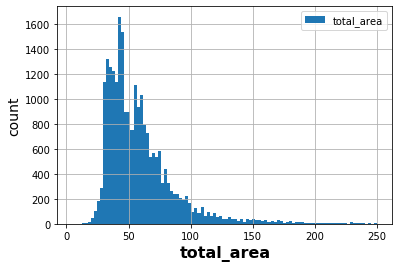

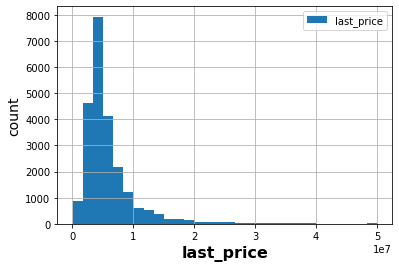

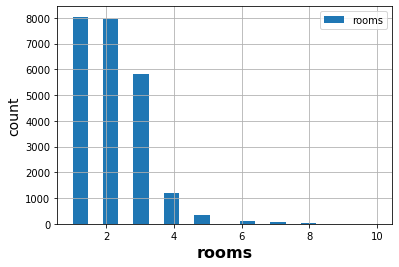

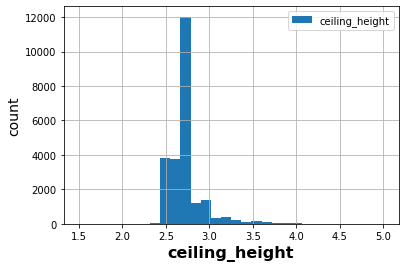

In [59]:
data['total_area'].hist(range=(5,250),bins=100, label=['total_area'])
plt.legend(loc='upper right')

plt.xlabel('total_area', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

data['last_price'].hist(bins=30, range=(10000, 50000000),label=['last_price'])
plt.legend(loc='upper right')
plt.xlabel('last_price', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

data['rooms'].hist(bins=20, range=(1,10),label=['rooms'])
plt.legend(loc='upper right')
plt.xlabel('rooms', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

data['ceiling_height'].hist(range=(1.5,5),bins=30,label=['ceiling_height'])
plt.legend(loc='upper right')
plt.xlabel('ceiling_height', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()


Исходя из графиков можно сказать, что большинсво квартир до 50 кв.м., имеющих по одной/две комнаты и высотой потолков от 2.5 до 3м. и практически все в районе 5млн. руб. Что свидетельсвует о том, что это давольно обычное жилье для среднего класса населения.

**4.2 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

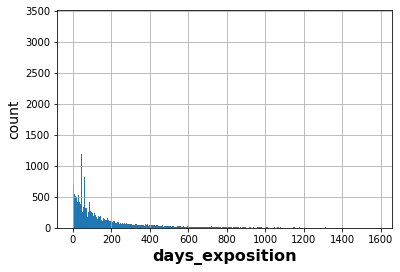

In [60]:
#sns.set(style="darkgrid")
days_exposition_avg=data['days_exposition'].mean()
days_exposition_median=data['days_exposition'].median()
data['days_exposition'].hist(bins=400)
plt.xlabel('days_exposition', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

In [36]:
print('Среднее время продажи квартиры:',days_exposition_avg)
print('Медиана времени продажи квартиры:',days_exposition_median)

Среднее время продажи квартиры: 156.60884
Медиана времени продажи квартиры: 74.0


**4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

In [37]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608841
std        213.546875
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

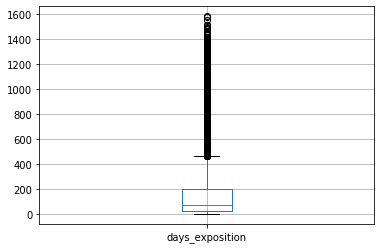

In [38]:
data.boxplot('days_exposition')

Медиана меньше среднего практически в 1,5 раза и очень большой хвост от третьего квартиля. От этого нужно избавляться.

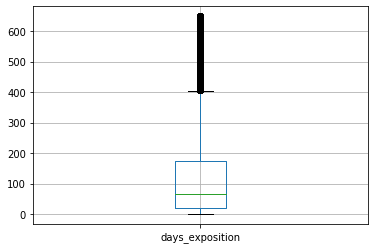

In [39]:
srez = data.query('days_exposition < 650')
srez.boxplot('days_exposition')

In [40]:
srez['days_exposition'].describe()

count    22686.000000
mean       123.611961
std        142.745972
min          0.000000
25%         20.000000
50%         67.000000
75%        174.000000
max        649.000000
Name: days_exposition, dtype: float64

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_avg,airports_nearest_avg,cityCenters_nearest_avg,parks_nearest_avg,ponds_nearest_avg,cost,weekday,floor_flat,ratio_total_living,ratio_kitchen_total
0,20,13000000.0,108.000000,2019-03-07,3,2.700000,16,51.000000,8,0,...,44.000000,26619.0,12219.0,0.0,46.0,120370.0,3,Другой,2.117647,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.771499,11,18.600000,1,0,...,17.360001,17380.5,24211.0,0.0,0.0,82921.0,1,Первый,2.172043,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.771499,5,34.299999,4,0,...,30.000000,26619.0,12219.0,0.0,46.0,92786.0,3,Другой,1.632653,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14,44.000000,9,0,...,44.000000,26619.0,12219.0,0.0,46.0,408176.0,4,Другой,3.613636,0.066477
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.000000,13,0,...,30.000000,26619.0,12219.0,0.0,46.0,100000.0,1,Другой,3.125000,0.410000


Теперь медиана и среднее практически равны, что сведетельсвует нормальному распределению, можно смело сказать, что быстрые продажи происходят до 50 дней с момента появления объявления о продаже

В целом можно сказать, что квартиры продаются первые 200 дней после того, как выложили объявления. Также имеется единичный вспеслк на нуле, можно предположить, что это либо артефакт, либо единичная сделка.

**4.4 Какие факторы больше всего влияют на стоимость квартиры?**      

***4.4.1 Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.***

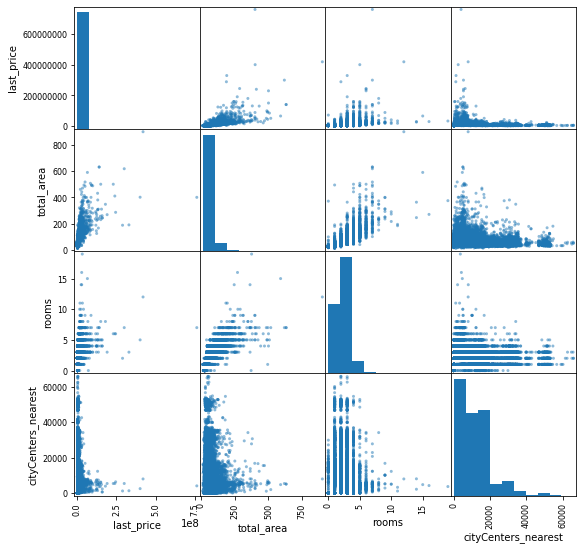

In [42]:
data_price_11 = pd.DataFrame(data = data, columns = ['last_price','total_area', 'rooms', 'cityCenters_nearest'])
pd.plotting.scatter_matrix(data_price_11, figsize=(9, 9)) 
plt.show()

In [43]:
data_price_11.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653675,0.363343,-0.048642
total_area,0.653675,1.000000,0.758344,-0.075184
rooms,0.363343,0.758344,1.000000,-0.059976
cityCenters_nearest,-0.048642,-0.075184,-0.059976,1.000000


Глядя на графики и корелляционные значение можно сделать вывод, цена очень сильно зависит от числа комнат и площади квартиры.

***4.4.2 Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.***

In [84]:
data_ratio_42=data.pivot_table(index=['floor_flat'], values=['last_price'], aggfunc=['mean','count'])
data_ratio_42.head(10)

,mean,count
,last_price,last_price
floor_flat,,
Другой,6675470.0,17443
Первый,4820982.0,2892
Последний,7326295.5,3364


Определенно квартиры на последних этажах самы дорогие, потому что зачастую в таких квартирах открывается красивый вид
...и маловероятно, что кто-то залезет в форточку

***4.4.3 Изучите зависимость от даты размещения: дня недели, месяца и года.***

In [74]:
data['year'] = data['first_day_exposition'].dt.year #год
data['month'] = data['first_day_exposition'].dt.month #месяц
data['first_day_exposition'].dt.weekday #день недели

      count        mean
year                   
2014    137  12087136.0
2015   1191   8572833.0
2016   2783   6827912.0
2017   8190   6585729.5
2018   8519   5950966.5
2019   2879   6782388.5


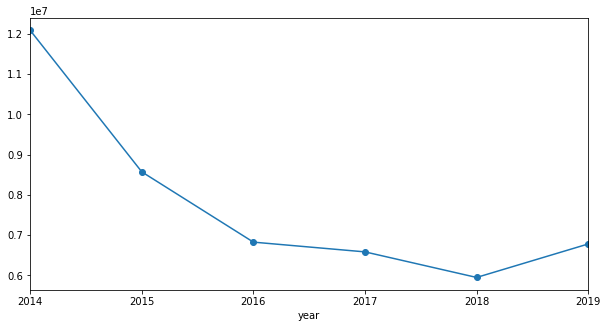

In [92]:
data_ratio_y=data.pivot_table(index=['year'], values=['last_price'], aggfunc=['count','mean'])
data_ratio_y.columns=['count', 'mean']
print(data_ratio_y)
data_ratio_y['mean'].plot(style='-o',figsize=(10, 5))
plt.show()

       count       mean
month                  
1       1500  6668233.0
2       2640  6468500.0
3       2587  6359275.5
4       2379  6737198.5
5       1274  6600435.0
6       1760  6310269.5
7       1695  6649337.5
8       1744  6350233.0
9       1981  6825470.0
10      2127  6235013.0
11      2371  6461362.5
12      1641  7011731.5


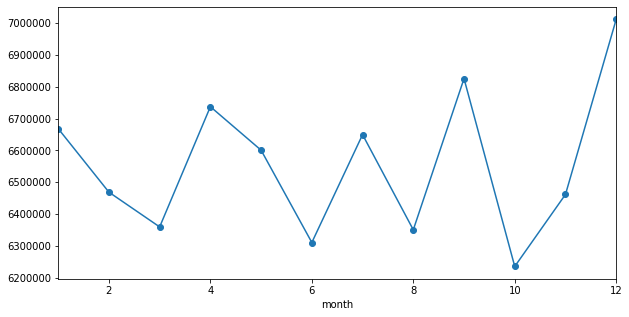

In [93]:
data_ratio_m=data.pivot_table(index=['month'], values=['last_price'], aggfunc=['count','mean'])
data_ratio_m.columns=['count', 'mean']
print(data_ratio_m)
data_ratio_m['mean'].plot(style='-o',figsize=(10, 5))
plt.show()

             count       mean
        last_price last_price
weekday                      
0             3612  6511613.5
1             4183  6394233.5
2             3974  6627970.5
3             4295  6708663.0
4             4000  6372130.5
5             1936  6976804.0
6             1699  6246180.5


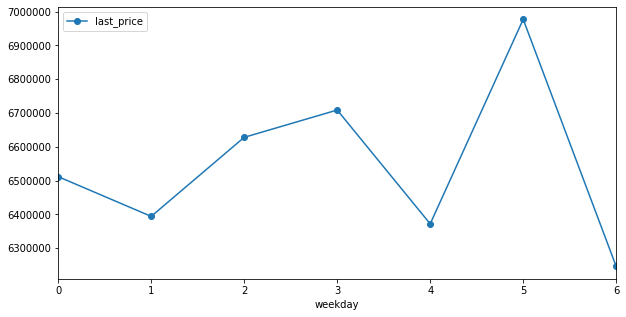

In [94]:
data_ratio_weekday=data.pivot_table(index=['weekday'], values=['last_price'], aggfunc=['count','mean'])
print(data_ratio_weekday)
data_ratio_weekday['mean'].plot(style='-o',figsize=(10, 5))
plt.show()

                      count        mean
first_day_exposition                   
2014-11-27               19  13960842.0
2014-11-29                1   5500000.0
2014-12-04                2   3960875.0
2014-12-05                1   1300000.0
2014-12-08                8   6978625.0


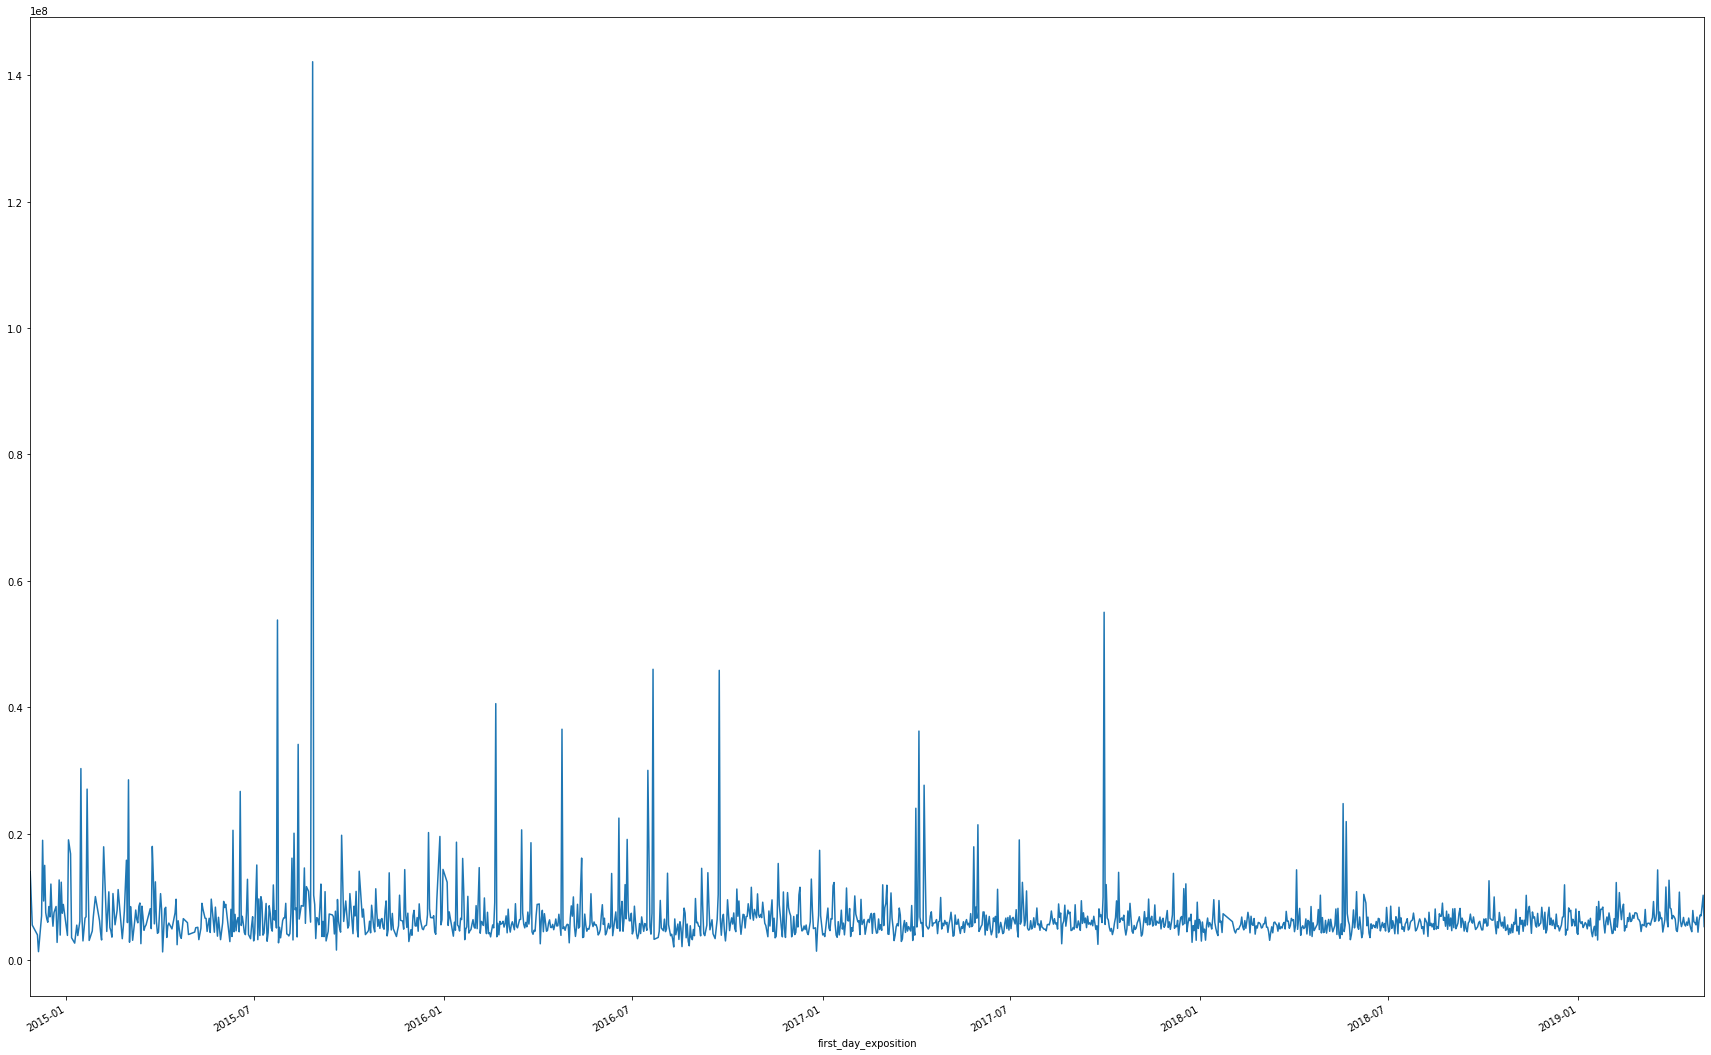

In [95]:
data_ratio_year=data.pivot_table(index=['first_day_exposition'], values=['last_price'],aggfunc=['count','mean'])
data_ratio_year.columns=['count', 'mean']
print(data_ratio_year.head())
data_ratio_year['mean'].plot(figsize=(30, 20))
plt.show()

В целом если смотреть на цены по дням недели, то можно заметить небольшое повышение к выходным, а так цены практически не отличаюстся.

Видно, что до 2018 года квартиры в период осень/зима имели ценовые всплески, возможно это самые продктивные сезоны для работы, а значит у людей появляются деньги, которые они могут потратить и разумно повысить цены на жилье.Т.к сезон весна/лето у людей больше нацелен на отдых, а не на крупные покупки. После 2018 года таких всплесков не наблюдается, не могу назвать точную причину, возможно экономка или принятие новых законов, это вопрос мне кажется для отдельной гипотезы.

p.s. мне показалось, что лучше будет видна картина год/сезон, чем разбивать на отдельные категории, тк каждый год, что-то да происходит. Как пример пандемия в 2020, и если учитывать, условно, май 2020, то он мне кажется будет портить данные.

**4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

In [46]:
top_name=data['locality_name'].value_counts().head(10)
top_name

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [47]:
top_name_stat=data.query('locality_name in @top_name.index').pivot_table(index='locality_name', values='cost', aggfunc=['mean', 'median'])
top_name_stat.columns=['mean', 'median']
top_name_stat

,mean,median
locality_name,,
Всеволожск,68654.476562,65789.0
Выборг,58141.917969,58158.0
Гатчина,68746.109375,67797.0
Колпино,75424.570312,74723.5
Пушкин,103125.820312,100000.0
Санкт-Петербург,114849.007812,104762.0
деревня Кудрово,92473.585938,91860.0
посёлок Мурино,85752.187500,85878.5
посёлок Парголово,90175.890625,91643.0


In [48]:
print('Самая низкая стоимость жилья в городе Выборг:',top_name_stat['mean'].min())
print('Самая высокая стоимость жилья в городе Санкт-Петербург:',top_name_stat['mean'].max())

Самая низкая стоимость жилья в городе Выборг: 58141.918
Самая высокая стоимость жилья в городе Санкт-Петербург: 114849.01


Отчевидно, что в Выборге будет самая дешевая стоимоть жилья, просто плюсуя те факторы, что он 140км от СПб, Лен.Обл., с населением 70к, находится на границе с Финляндией. И самая дорогая стоимость в СПб- культурная столица России...и добавить нечего.

**4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

In [49]:
srez_spb = data.query('locality_name == "Санкт-Петербург"')
srez_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_avg,airports_nearest_avg,cityCenters_nearest_avg,parks_nearest_avg,ponds_nearest_avg,cost,weekday,floor_flat,ratio_total_living,ratio_kitchen_total
0,20,13000000.0,108.000000,2019-03-07,3,2.700000,16,51.000000,8,0,...,44.000000,26619.0,12219.0,0.0,46.0,120370.0,3,Другой,2.117647,0.231481
2,10,5196000.0,56.000000,2015-08-20,2,2.771499,5,34.299999,4,0,...,30.000000,26619.0,12219.0,0.0,46.0,92786.0,3,Другой,1.632653,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14,44.000000,9,0,...,44.000000,26619.0,12219.0,0.0,46.0,408176.0,4,Другой,3.613636,0.066477
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.000000,13,0,...,30.000000,26619.0,12219.0,0.0,46.0,100000.0,1,Другой,3.125000,0.410000
7,5,7915000.0,71.599998,2019-04-18,2,2.771499,24,30.000000,22,0,...,30.000000,26619.0,12219.0,0.0,46.0,110545.0,3,Другой,2.386667,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.299999,2018-02-28,1,2.860000,15,16.299999,4,0,...,17.360001,26619.0,12219.0,0.0,46.0,100567.0,2,Другой,2.165644,0.257790
23690,3,5500000.0,52.000000,2018-07-19,2,2.771499,5,31.000000,2,0,...,30.000000,26619.0,12219.0,0.0,46.0,105769.0,3,Другой,1.677419,0.115385
23691,11,9470000.0,72.900002,2016-10-13,2,2.750000,25,40.299999,7,0,...,30.000000,26619.0,12219.0,0.0,46.0,129904.0,3,Другой,1.808933,0.145405
23694,9,9700000.0,133.809998,2017-03-21,3,3.700000,5,73.300003,3,0,...,44.000000,26619.0,12219.0,0.0,46.0,72491.0,1,Другой,1.825511,0.103356


In [50]:
srez_spb['dist'] = round(data['cityCenters_nearest']/1000)
srez_spb_pivot= srez_spb.pivot_table(index='dist', values=['cost'], aggfunc=['count','mean','median'])
srez_spb_pivot.columns=['count','mean', 'median']
srez_spb_pivot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,mean,median
dist,,,
0.0,27,245833.515625,172619.0
1.0,192,177005.390625,128485.0
2.0,310,157848.984375,123035.5
3.0,350,121387.445312,108469.5
4.0,688,133282.875000,117952.5
5.0,920,140509.781250,127093.5
6.0,618,151012.187500,131835.0
7.0,420,156176.859375,127017.0
8.0,597,125671.445312,122945.0


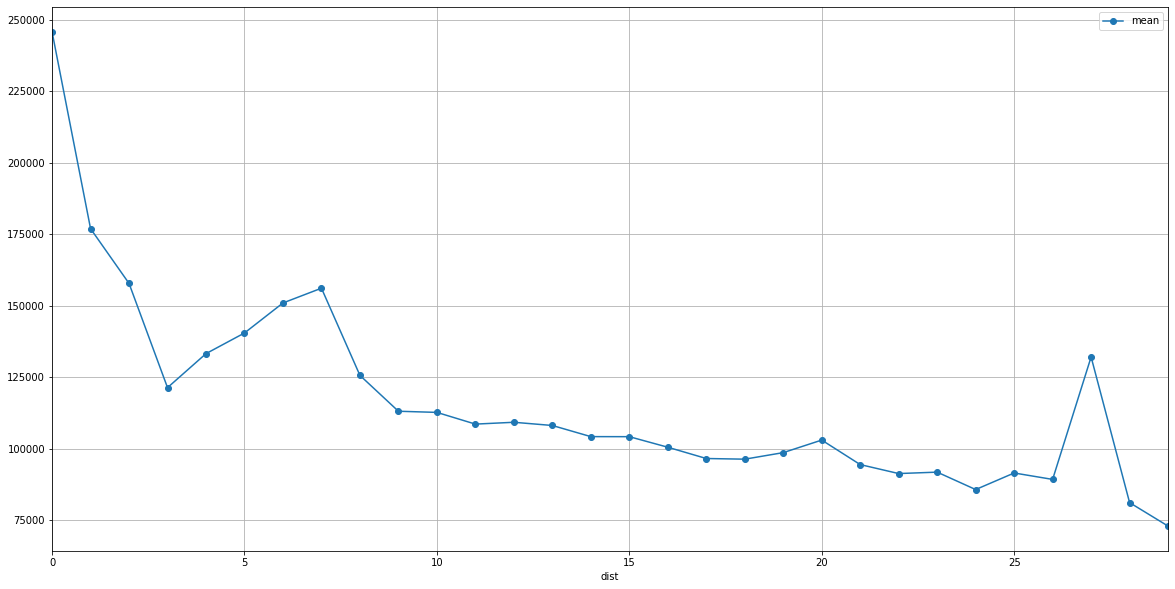

In [61]:
srez_spb_pivot.plot(y='mean',style='o-', grid=True, figsize=(20,10))
plt.show()

Предпологаю, что центром можно считать все в радиусе 10км, т.к. цены на 10км оказались, можно сказать, граничищими на спад.

Отчевидный рост цен тех квартир, которые расположены близко к центру(менее 5км). И вспелск на 27км, возможно это связано с тем, что там было всего лишь две продажи.

**4.6 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

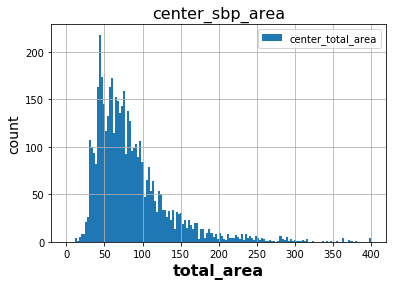

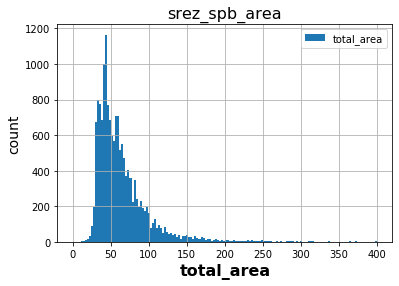

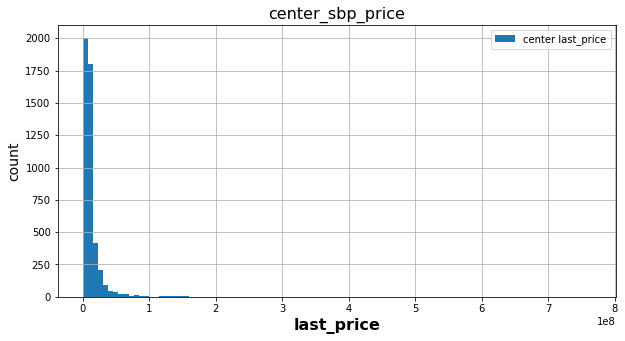

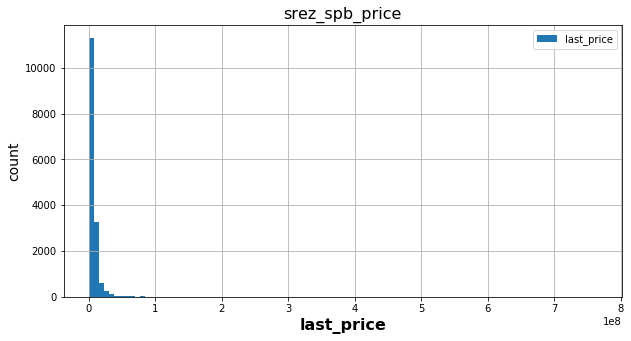

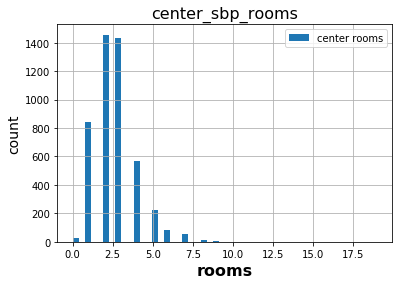

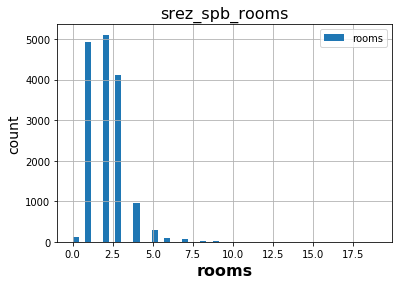

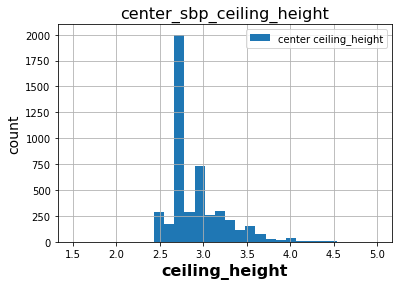

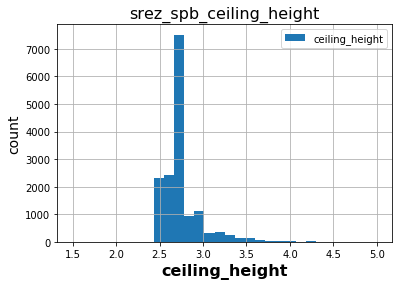

In [64]:
center_sbp = srez_spb.query('dist < 10')

center_sbp['total_area'].hist(range=(0,400),bins=150, label=['center_total_area'])
plt.legend(loc='upper right')
plt.title('center_sbp_area', fontweight='normal', color='k', fontsize=16)
plt.xlabel('total_area', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

srez_spb['total_area'].hist(range=(0,400),bins=150, label=['total_area'])
plt.legend(loc='upper right')
plt.title('srez_spb_area', fontweight='normal', color='k', fontsize=16)
plt.xlabel('total_area', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

center_sbp['last_price'].hist(bins=100,figsize=(10,5), label=['center last_price'])
plt.legend(loc='upper right')
plt.title('center_sbp_price', fontweight='normal', color='k', fontsize=16)
plt.xlabel('last_price', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

srez_spb['last_price'].hist(bins=100,figsize=(10,5), label=['last_price'])
plt.legend(loc='upper right')
plt.title('srez_spb_price', fontweight='normal', color='k', fontsize=16)
plt.xlabel('last_price', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

center_sbp['rooms'].hist(bins=50, label=['center rooms'])
plt.legend(loc='upper right')
plt.title('center_sbp_rooms', fontweight='normal', color='k', fontsize=16)
plt.xlabel('rooms', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

srez_spb['rooms'].hist(bins=50, label=['rooms'])
plt.legend(loc='upper right')
plt.title('srez_spb_rooms', fontweight='normal', color='k', fontsize=16)
plt.xlabel('rooms', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

center_sbp['ceiling_height'].hist(bins=30, range=(1.5,5), label=['center ceiling_height'])
plt.legend(loc='upper right')
plt.title('center_sbp_ceiling_height', fontweight='normal', color='k', fontsize=16)
plt.xlabel('ceiling_height', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()

srez_spb['ceiling_height'].hist(bins=30, range=(1.5,5), label=['ceiling_height'])
plt.legend(loc='upper right')
plt.title('srez_spb_ceiling_height', fontweight='normal', color='k', fontsize=16)
plt.xlabel('ceiling_height', fontweight='bold', fontsize=16)
plt.ylabel('count', fontweight='light', fontsize=14)
plt.grid(True)
plt.show()


По центру Питера можно сказать, что квартир больше и вцелом жилье дороже, чем по всей выборке, и потолки выше

In [53]:
center_sbp.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_avg,cityCenters_nearest_avg,parks_nearest_avg,ponds_nearest_avg,cost,weekday,floor_flat,ratio_total_living,ratio_kitchen_total,dist
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14,44.0,9,0,...,26619.0,12219.0,0.0,46.0,408176.0,4,Другой,3.613636,0.066477,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.0,13,0,...,26619.0,12219.0,0.0,46.0,100000.0,1,Другой,3.125000,0.410000,8.0
24,8,6500000.0,97.199997,2015-10-31,2,2.771499,3,46.5,1,0,...,26619.0,12219.0,0.0,46.0,66872.0,5,Первый,2.090322,0.201646,2.0
35,6,15500000.0,149.000000,2017-06-26,5,2.771499,5,104.0,4,0,...,26619.0,12219.0,0.0,46.0,104027.0,0,Другой,1.432692,0.114094,4.0
51,7,45000000.0,161.000000,2017-10-17,3,3.200000,8,38.0,4,0,...,26619.0,12219.0,0.0,46.0,279503.0,1,Другой,4.236842,0.310559,7.0


**Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).**

                     last_price     rooms     floor  cityCenters_nearest
last_price             1.000000  0.351014  0.087758            -0.125607
rooms                  0.351014  1.000000 -0.069293            -0.256693
floor                  0.087758 -0.069293  1.000000             0.274391
cityCenters_nearest   -0.125607 -0.256693  0.274391             1.000000


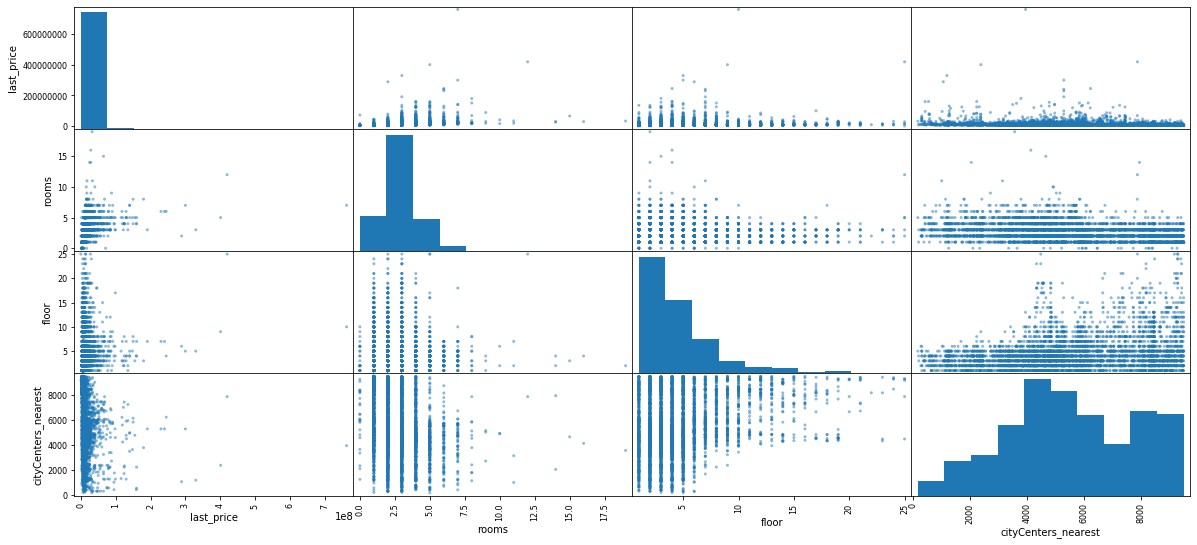

In [54]:
center_sbp_stat=center_sbp[['last_price','rooms', 'floor', 'cityCenters_nearest','first_day_exposition']]
pd.plotting.scatter_matrix(center_sbp_stat, figsize=(20, 9)) 
print(center_sbp_stat.corr())


                     last_price     rooms     floor  cityCenters_nearest
last_price             1.000000  0.372375 -0.000838            -0.257846
rooms                  0.372375  1.000000 -0.160202            -0.292988
floor                 -0.000838 -0.160202  1.000000             0.228034
cityCenters_nearest   -0.257846 -0.292988  0.228034             1.000000


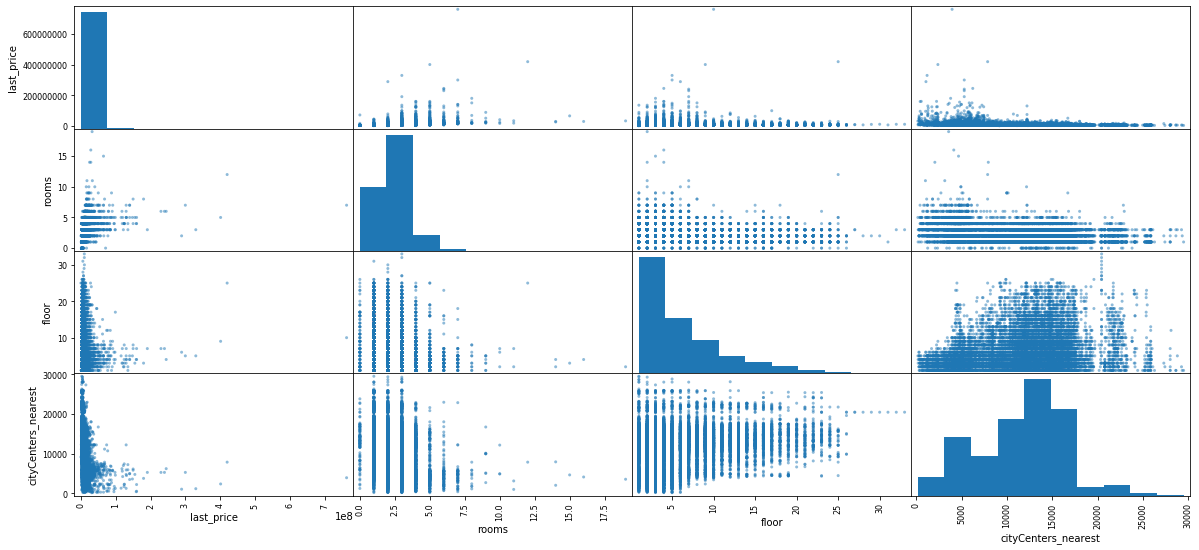

In [55]:
srez_spb_stat=srez_spb[['last_price','rooms', 'floor', 'cityCenters_nearest','first_day_exposition']]
pd.plotting.scatter_matrix(srez_spb_stat, figsize=(20, 9)) 
print(srez_spb_stat.corr())

В независимости центр/не центр, большую роль в цене играет количесво комнат

## Общий вывод

Из всего этого можно сделать вывод, что самые дорогие квартиры в Санкт-Питербурге, особенно те которые находятся в пределах 10км от центра,неплохие варианты можно рассматривать от 12 до 16км от центра, судя по количесву сделок в этих пределах, думаю это о чем-то говорит. Цена квартиры очень зависит от количесва комнат в ней. Картиру стоит покупать в первой половине года, т.к. цены идут на спад. 
Самый достойный вариант, считаю, это деревня Кудрово, находится в перделах КАД и цена за кв.м. приемлимая.